In [7]:
#importing Libraries


In [8]:
#Iris Flower Clssification

#import required modules
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [9]:
%pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [10]:
#loading dataset
import pandas as pd
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
#deleting id column
df=df.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
#displaying basic stats
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing **DataSet**

In [15]:
#check nullvalues
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data **analysis**

<Axes: >

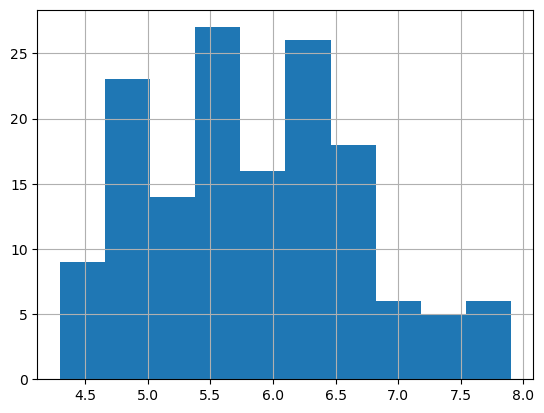

In [16]:
df['SepalLengthCm'].hist()

<Axes: >

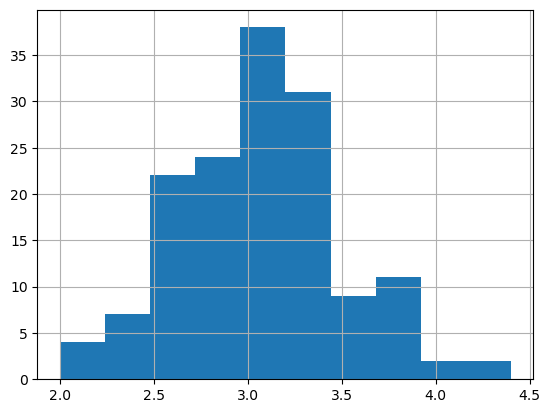

In [17]:
df['SepalWidthCm'].hist()

<Axes: >

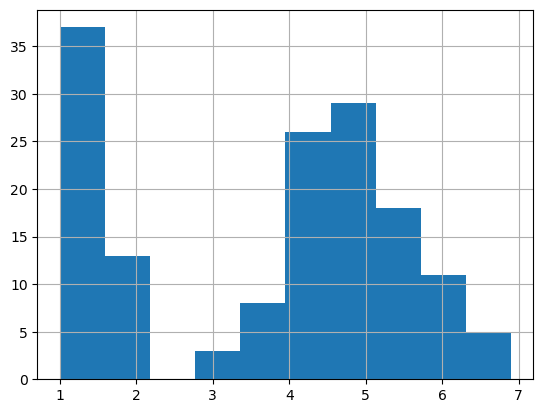

In [18]:
df['PetalLengthCm'].hist()

<Axes: >

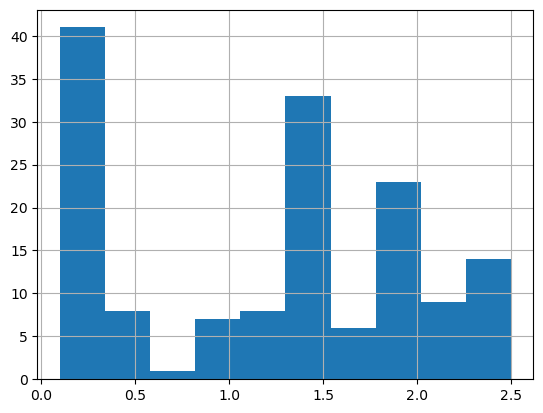

In [19]:
df['PetalWidthCm'].hist()

In [20]:
df.select_dtypes(include=['number']).corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

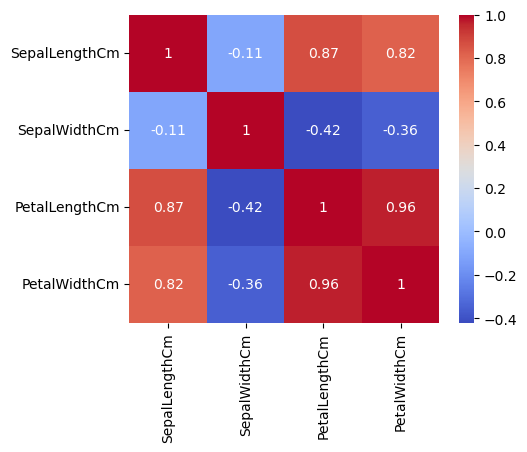

In [21]:
#Drawing correlation matrix
corr=df.corr(numeric_only=True)

fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [22]:
#we can also plot scatterplot for understanding dataset more

# LABEL **ENCODER**

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
#trabsform string labels to iterger
df['Species']=Le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# ***MODEL TRAINING AND TESTING***

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

#input data
X=df.drop(columns=['Species'])
#output data
Y=df['Species']

#split the data in train and test

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [25]:
#Logistic Regression
model=LogisticRegression()
model.fit(X_train,Y_train)
print("logistic regression accuracy:",model.score(X_test,Y_test)*100)


logistic regression accuracy: 100.0


In [26]:
#model training
model.fit(X_train.values,Y_train.values)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
#print metric to get performance
print("Accuracy: ",model.score(X_test,Y_test)*100)

Accuracy:  100.0


In [28]:
#k-nearest neighbros
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
print("Decision Tree accuracy:",model.score(X_test,Y_test)*100)

Decision Tree accuracy: 100.0


In [37]:
#save the model
import pickle
import sklearn
filename='saved_model.sav'
pickle.dump(model,open(filename,'wb'))


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



In [30]:
import pickle

In [31]:
#save the updated model
filename='saved_model.sav'
try:
  with open(filename,'wb') as f:
    pickle.dump(model,f)
  print("model saved successfully")
except Exception as e:
  print(e)
pickle.dump(model,open(filename,'wb'))

model saved successfully


In [32]:
load_model=pickle.load(open(filename,'rb'))

In [33]:
load_model.predict([[6.0,2.2,4.0,1.0]])


array([1])

In [34]:
import sklearn
print(sklearn.__version__)

1.7.1


In [35]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [36]:
load_model.predict([[4,3,1,5]])

array([2])